In [18]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.externals.joblib import dump,load
%matplotlib inline

In [19]:
ML_df = pd.read_csv("data\ML_dataset.csv")

In [20]:
ML_df = ML_df.sample(n=100000)
#SVR doesn't handle Larger datasets well

In [21]:
Labels = ML_df.columns[:6].tolist() #columns of drugs

print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count']


In [22]:
X = ML_df[Labels].values #input
y = ML_df["brand_percent_spending"].values #label
# Seperate into attributes and Labels
#print(X)
#print(len(X))
#print(len(y))
#print(y)

In [23]:
#PCA = PCA(n_components = 'mle')
#PCA.fit_transform(X)

In [24]:
#print(PCA.explained_variance_ratio_) 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#seperate into Training and Test Data

In [26]:
#other kernel options: linear, poly, rbf, sigmoid, precomputed 
svregressor = LinearSVR(epsilon = .5, C = 50, verbose =1)
svregressor.fit(X_train,y_train)

[LibLinear]

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=50, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=1)

In [27]:
print(svregressor.coef_)

[ 3.12973964e-03  4.16111325e-05 -1.34333283e-04  1.02300079e-06
 -2.48635166e-06  8.82430466e-05]


In [28]:
coeff_df = pd.DataFrame( svregressor.coef_, Labels, columns=['Coefficient'])  
coeff_df = coeff_df[coeff_df["Coefficient"] != 0]
coeff_df.sort_values("Coefficient" ,ascending = False)

,Coefficient
specialty_description,0.003130
total_30_day_fill_count,0.000088
nppes_provider_city,0.000042
total_drug_cost,0.000001
total_day_supply,-0.000002
total_claim_count,-0.000134


In [29]:
#predictions
y_pred =svregressor.predict(X_test)

In [30]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25)

,Actual,Predicted
0,0.805778,0.619404
1,0.787350,0.427126
2,0.797788,0.643276
3,0.850848,0.678613
4,0.867696,0.505321
5,0.577736,0.473476
6,0.860033,0.728816
7,0.865174,0.697440
8,0.857782,0.648174
9,0.284890,0.644313


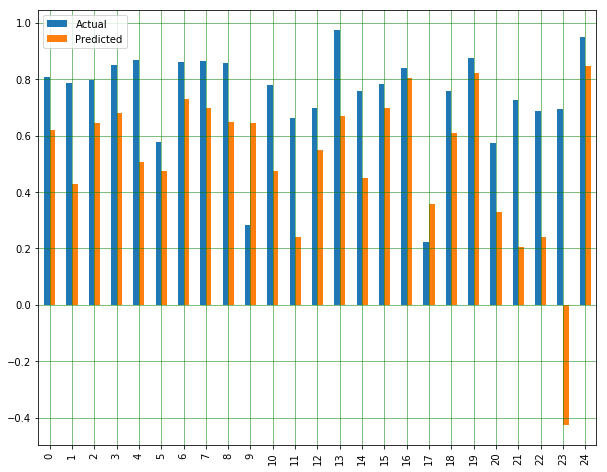

In [31]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

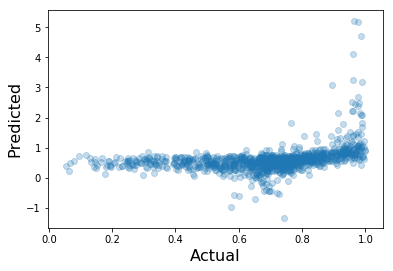

In [32]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

In [33]:
print("r Squared:", metrics.r2_score(y_test, y_pred))

r Squared: -3.5074313714345555


In [34]:
dump(svregressor, "SVR.joblib")

['SVR.joblib']